![](escudo.png)

# Analisis masivos de datos
## Introduccion a dataframes en pandas
### Jose Gabriel Rodriguez Rivas
## Jorge Alberto Hernabdez

## Tabla de Contenido

[1-. Crear subconjuntos de datos y organizarlos en marcos de datos más pequeños](#id1)<br>
[2-. Graficar datos](#id2)<br>
[3-. Trazar grafico en mapa](#id3)<br>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [3]:
dataset_path = 'Map-Crime_Incidents-Previous_Three_Months.csv'

In [4]:
SF = pd.read_csv(dataset_path)
SF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"


In [5]:
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

¿Cuántas variables se incluyen en el marco de datos de SF (ignore el índice)?**

Respuesta 11

In [6]:
len(SF)

30760

In [7]:
SF['Month'] = SF['Date'].apply( lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply( lambda row: int(row[3:5]))

In [8]:
del SF['IncidntNum']

In [9]:
SF

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30755,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)",6,1
30756,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)",6,1
30757,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)",6,1
30758,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)",6,1


In [10]:
SF.drop('Location', axis=1, inplace= True)

In [11]:
SF.head()


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31


In [12]:
concatCategorias = SF['Category'].value_counts()
concatCategorias.tail(10)


SUICIDE                       14
FAMILY OFFENSES                9
STOLEN PROPERTY                7
EXTORTION                      7
SEX OFFENSES, NON FORCIBLE     5
LOITERING                      5
BAD CHECKS                     3
BRIBERY                        1
GAMBLING                       1
PORNOGRAPHY/OBSCENE MAT        1
Name: Category, dtype: int64

In [13]:
concatCategorias = SF['Category'].value_counts(ascending=True)
concatCategorias


PORNOGRAPHY/OBSCENE MAT           1
GAMBLING                          1
BRIBERY                           1
BAD CHECKS                        3
LOITERING                         5
SEX OFFENSES, NON FORCIBLE        5
EXTORTION                         7
STOLEN PROPERTY                   7
FAMILY OFFENSES                   9
SUICIDE                          14
EMBEZZLEMENT                     19
LIQUOR LAWS                      38
PROSTITUTION                     44
ARSON                            60
RUNAWAY                          61
DISORDERLY CONDUCT               69
FORGERY/COUNTERFEITING           88
DRIVING UNDER THE INFLUENCE      93
SEX OFFENSES, FORCIBLE          123
KIDNAPPING                      128
DRUNKENNESS                     142
TRESPASS                        259
WEAPON LAWS                     322
FRAUD                           574
SUSPICIOUS OCC                  682
ROBBERY                         862
MISSING PERSON                 1135
BURGLARY                    

In [14]:
concatCategorias = SF['PdDistrict'].value_counts().head(1)
concatCategorias


SOUTHERN    6185
Name: PdDistrict, dtype: int64

## Crear subconjuntos de datos y organizarlos en marcos de datos más pequeños<a id='id1'></a>

In [15]:
crimenesAgosto = SF[SF['Month']  == 8 ]
crimenesAgosto.head(10)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
5,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,8,31
6,WARRANTS,WARRANT ARREST,Sunday,08/31/2014 07:00:00 AM +0000,18:51,RICHMOND,"ARREST, BOOKED",MARTIN LUTHER KING JR DR / 25TH AV,-122.482372,37.766770,8,31
7,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,8,31
8,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/31/2014 07:00:00 AM +0000,16:30,CENTRAL,NONE,100.0 Block of JACKSON ST,-122.398859,37.796984,8,31
9,ROBBERY,ROBBERY OF A CHAIN STORE WITH BODILY FORCE,Sunday,08/31/2014 07:00:00 AM +0000,18:18,CENTRAL,NONE,300.0 Block of POWELL ST,-122.408334,37.787683,8,31


In [16]:
len(crimenesAgosto)

9720

¿Cuántos robos se informaron en agosto?

In [17]:
robosAgosto = SF[ (SF['Category']  == 'LARCENY/THEFT') | 
                 (SF['Category']  == 'VEHICLE THEFT' ) ]
robosAgosto

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
5,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,00:01,CENTRAL,NONE,GRANT AV / SUTTER ST,-122.405403,37.789630,8,31
7,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,08/31/2014 07:00:00 AM +0000,10:30,INGLESIDE,NONE,200.0 Block of ATHENS ST,-122.427017,37.723453,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
30743,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,06/01/2014 07:00:00 AM +0000,11:15,BAYVIEW,NONE,1300.0 Block of FELTON ST,-122.417591,37.726603,6,1
30748,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,06/01/2014 07:00:00 AM +0000,02:00,SOUTHERN,NONE,300.0 Block of 11TH ST,-122.412843,37.770966,6,1
30751,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,16:17,MISSION,"ARREST, BOOKED",2000.0 Block of MARKET ST,-122.426893,37.769162,6,1
30752,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,06/01/2014 07:00:00 AM +0000,20:30,BAYVIEW,NONE,1200.0 Block of WAYLAND ST,-122.414258,37.723638,6,1


In [18]:
# subconjunto de datos de delitos el dia 31 de Agosto
crimenes0105 = SF.query('Month == 8 and Day == 31')
crimenes0105.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31


## Graficar datos <a id='id2'></a>

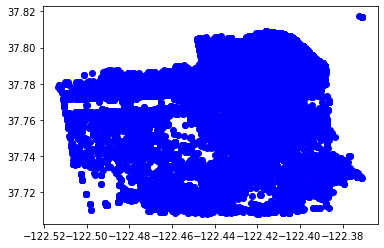

In [19]:
plt.plot(SF['X'], SF['Y'], 'bo')
plt.show()

In [20]:
distritos = np.unique(SF['PdDistrict'])
colores_distritos = dict(zip(distritos, range(len(distritos))))
colores_distritos

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [21]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: colores_distritos[row])

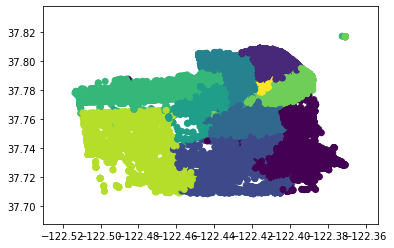

In [22]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'] )

## Trazar grafico en mapa <a id='id3'></a>

In [23]:
# Code cell 24
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [24]:
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))  
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [25]:
# Code cell 26
#Create map
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list( zip( SF['Y'], SF['X'], SF['PdDistrict']) )

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2], 
                        radius=5).add_to(map_osm)

In [26]:
# Code cell 27
map_osm